In [11]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Agglomerative Clustering


1. the algorithm starts by declaring each point its own cluster,
and 
2. then merges the two most similar clusters until some stopping criterion is satis‐
fied. 
3. The stopping criterion implemented in scikit-learn is the number of clusters specified,
so similar clusters are merged until only the specified number of clusters are left.
4.  linkage criteria that specify how exactly the “most similar cluster” is
measured. 
5. This measure is always defined between two existing clusters.
6. The following three choices are implemented in scikit-learn:
    1. ward
    
    The default choice, ward picks the two clusters to merge such that the variance
    within all clusters increases the least. This often leads to clusters that are rela‐
    tively equally sized.
    2. average
    
    average linkage merges the two clusters that have the smallest average distance
    between all their points.
    3. complete
    
    complete linkage (also known as maximum linkage) merges the two clusters that
    have the smallest maximum distance between their points.
1. ward works on most datasets 
2. If the clusters have
very dissimilar numbers of members (if one is much bigger than all the others, for
example), average or complete might work better.

Because of the way the algorithm works, agglomerative
clustering cannot make predictions for new data points. Therefore, Agglomerative
Clustering has no predict method. 

To build the model and get the cluster member‐
ships on the training set, use the fit_predict method instead

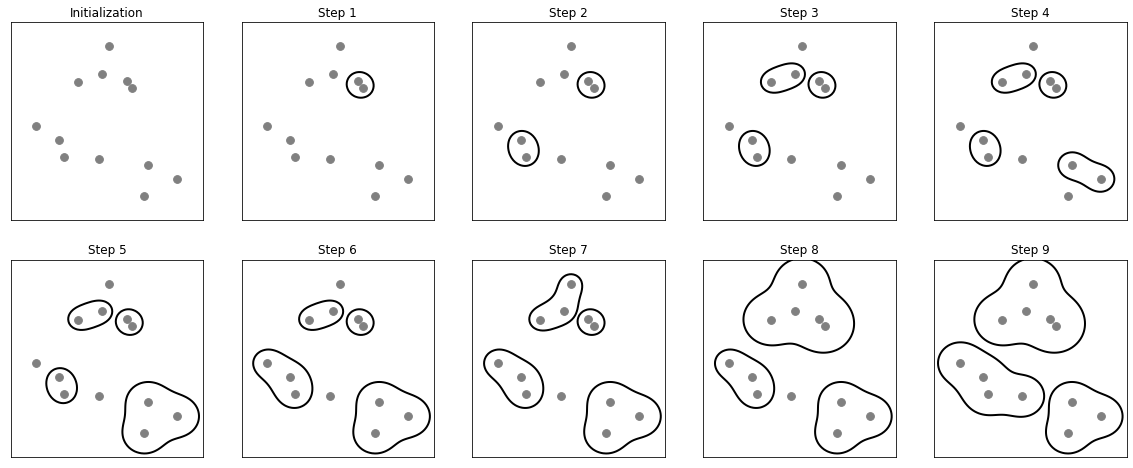

In [2]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

In [27]:
ag = AgglomerativeClustering(n_clusters=3)

In [9]:
ag.fit_predict(X)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

In [28]:
ag.fit(X)
ag.

AgglomerativeClustering(n_clusters=3)

In [32]:
from sklearn.metrics import silhouette_score
kmn = [AgglomerativeClustering(n_clusters=i).fit(X) for i in range(1,10)]
silhouette_score = [silhouette_score(X, j.labels_) for j in kmn[1:]]

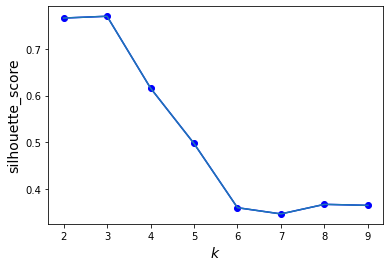

In [33]:
k =[m for m in range(2,10)]
plt.plot(range(2, 10), silhouette_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)

plt.plot(k,silhouette_score)

Text(0, 0.5, 'Feature 1')

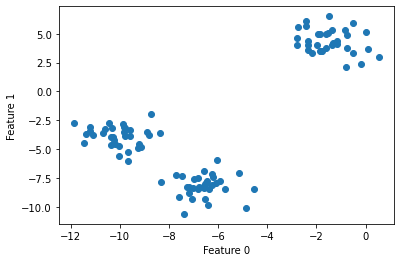

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Hierarchical clustering and dendrogramstool to visualize
hierarchical clustering, called a dendrogram, that can handle multidimensional
datasets.

 you can generate them easily using SciPy. The SciPy clustering
algorithms have a slightly different interface to the scikit-learn clustering algo‐
rithms. SciPy provides a function that takes a data array X and computes a linkage
array, which encodes hierarchical cluster similarities. We can then feed this linkage
array into the scipy dendrogram function to plot the dendrogram

In [15]:
from scipy.cluster.hierarchy import dendrogram, ward

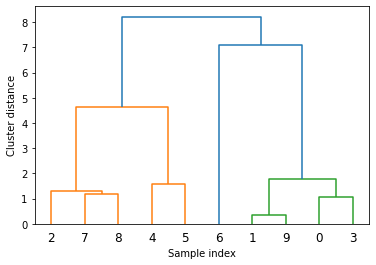

In [23]:
X, y = make_blobs(random_state=0, n_samples=10)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
#plt.figure(figsize=(20,20))
dendrogram(linkage_array)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

The dendrogram shows data points as points on the bottom (numbered from 0 to
11). Then, a tree is plotted with these points (representing single-point clusters) as the
leaves, and a new node parent is added for each two clusters that are joined.

The y-axis in the dendrogram doesn’t just specify when in the agglomerative algo‐
rithm two clusters get merged. The length of each branch also shows how far apart
the merged clusters are. The longest branches in this dendrogram are the three lines
that are marked by the dashed line labeled “three clusters.” That these are the longest
branches indicates that going from three to two clusters meant merging some very
far-apart points. We see this again at the top of the chart, where merging the two
remaining clusters into a single cluster again bridges a relatively large distance.
Unfortunately, agglomerative clustering still fails at separating complex shapes like
the two_moons dataset. But the same is not true for the next algorithm we will look at,
DBSCAN.


In [24]:
#example

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


# DBSCAN
Another very useful clustering algorithm is DBSCAN (which stands for “densitybased spatial clustering of applications with noise”). The main benefits of DBSCAN
are that it does not require the user to set the number of clusters a priori, it can cap‐
ture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but
still scales to relatively large datasets.

Points that are within a dense region are called core samples (or core points), and they
are defined as follows. There are two parameters in DBSCAN: min_samples and eps.
If there are at least min_samples many data points within a distance of eps to a given
data point, that data point is classified as a core sample. Core samples that are closer
to each other than the distance eps are put into the same cluster by DBSCAN.

In [34]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))


Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


As you can see, all data points were assigned the label -1, which stands for noise. This
is a consequence of the default parameter settings for eps and min_samples, which
are not tuned for small toy datasets

Like agglomerative clustering, DBSCAN does not allow predictions on
new test data, so we will use the fit_predict method to perform clustering and
return the cluster labels in one step:


Text(0, 0.5, 'Feature 1')

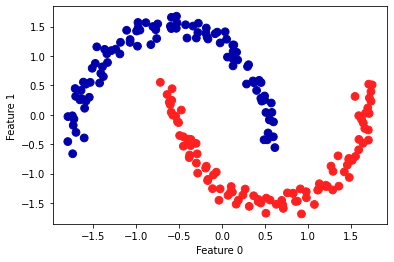

In [35]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
Evaluating clustering with ground truth
There are metrics that can be used to assess the outcome of a clustering algorithm
relative to a ground truth clustering


the most important ones being the adjusted rand
index (ARI) and normalized mutual information (NMI), which both provide a quanti‐
tative measure between 0 and 1.


In [39]:
# k-means, agglomerative clustering, and DBSCAN algorithms using ARI.

from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5015957062647948
0.6065184066117172
1.0


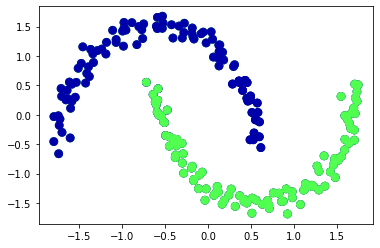

In [49]:
from sklearn.cluster import KMeans
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]
for i in algorithms:
    clusters = i.fit_predict(X_scaled)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60)
    print( adjusted_rand_score(y, clusters))